In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from data_gen import *  
# from dlgn import trainDLGN
# from lcn import trainLCN
# from latent import trainLatentTree
# from tao import trainTAO
import dlgn
import lcn
import latent
import tao

In [6]:
algorithms = [dlgn.trainDLGN, lcn.trainLCN, latent.trainLatentTree, tao.trainTAO]

0.8848674525558149 0.7423035474314879 -0.9340161513391072
0.8866181264573597 1.0094960179278372 -0.5190998687815137


100%|██████████| 32768/32768 [34:22<00:00, 15.88it/s]


0.8848674525558149 0.7423035474314879 -0.9340161513391072
0.8866181264573597 1.0094960179278372 -0.5190998687815137


/home/sooraj/.local/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/home/sooraj/.local/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use c

0.6917848075230917 0.5185 0.6919163837432861 0.5183333333333333 0.6918544381459554 0.523
0.6905758171081543 0.5556666666666666 0.6907921682993571 0.5673333333333334 0.6904861081441244 0.556
0.6920343747138977 0.5068333333333334 0.6944526214599609 0.497 0.6923112227121989 0.5083333333333333
0.6893713949521383 0.5235 0.6893164437611897 0.517 0.6898682130177816 0.522
0.6875755939483642 0.543 0.6883046404520671 0.532 0.6875595556894938 0.5403333333333333
0.6885184424718221 0.5385 0.689519879659017 0.5336666666666666 0.6879223251342773 0.5453333333333333
0.6887732747395834 0.5395 0.6886165148417155 0.5373333333333333 0.6871001675923666 0.5456666666666666
0.6898884633382162 0.5416666666666666 0.6906681391398112 0.5346666666666666 0.6880582218170166 0.546
0.6875255602200826 0.5505 0.6899553858439128 0.5496666666666666 0.6883688335418701 0.548
0.6869620714187622 0.5455 0.6891793905893961 0.536 0.6875114911397299 0.5426666666666666
0.8848674525558149 0.7423035474314879 -0.9340161513391072
0.886

train loss 0.13356669: 100%|██████████| 10000/10000 [20:25<00:00,  8.16it/s]


0.9453333333333334 0.941
0.8848674525558149 0.7423035474314879 -0.9340161513391072
0.8866181264573597 1.0094960179278372 -0.5190998687815137
starting score 0.751
Train acc 0.7568333333333334
Test acc 0.7596666666666667


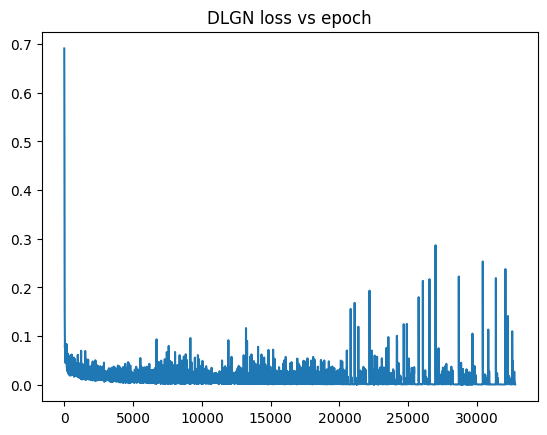

In [7]:
for algo in algorithms:

    seed_set = 0
    seeds = [1234]
    for seed in seeds:
        ((data_x, labels), (w_list, b_list, vals), stats) = data_gen_decision_tree(
    												dim=input_dim, seed=seed, num_levels=4,
    												num_data=num_data)
        seed_set=seed

    w_list_old = np.array(w_list)
    b_list_old = np.array(b_list)

    num_data = len(data_x)
    num_train= num_data//2
    num_vali = num_data//4
    num_test = num_data//4
    train_data = data_x[:num_train,:]
    train_data_labels = labels[:num_train]

    vali_data = data_x[num_train:num_train+num_vali,:]
    vali_data_labels = labels[num_train:num_train+num_vali]

    test_data = data_x[num_train+num_vali :,:]
    test_data_labels = labels[num_train+num_vali :] 

    algo(train_data, train_data_labels, vali_data, vali_data_labels, test_data, test_data_labels, w_list_old=w_list_old, b_list_old=b_list_old)